In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data_path = 'OV.methylation__humanmethylation450__jhu_usc_edu__Level_3__within_bioassay_data_set_function__data.data.txt'
df = pd.read_csv(data_path, sep='\t')

/tmp/ipykernel_2966/2888831559.py:2: DtypeWarning: Columns (1,4,5,8,9,12,13,16,17,20,21,24,25,28,29,32,33,36,37,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, sep='\t')


In [4]:
sample = df.columns # keep sample names

# changing structure of data frame
df.columns = df.iloc[0]
df = df.drop(0)
df = df.set_index(df.columns[0])

df.head()

,Beta_value,Gene_Symbol,Chromosome,Genomic_Coordinate,Beta_value,Gene_Symbol,Chromosome,Genomic_Coordinate,Beta_value,Gene_Symbol,...,Chromosome,Genomic_Coordinate,Beta_value,Gene_Symbol,Chromosome,Genomic_Coordinate,Beta_value,Gene_Symbol,Chromosome,Genomic_Coordinate
Composite Element REF,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.162232896986279,RBL2,16,53468112,0.191627667901702,RBL2,16,53468112,0.0712181967886229,RBL2,...,16,53468112,0.0681542463965581,RBL2,16,53468112,0.101053013486289,RBL2,16,53468112
cg00000108,NaN,C3orf35,3,37459206,NaN,C3orf35,3,37459206,NaN,C3orf35,...,3,37459206,NaN,C3orf35,3,37459206,NaN,C3orf35,3,37459206
cg00000109,NaN,FNDC3B,3,171916037,NaN,FNDC3B,3,171916037,NaN,FNDC3B,...,3,171916037,NaN,FNDC3B,3,171916037,NaN,FNDC3B,3,171916037
cg00000165,0.0774981107114241,NaN,1,91194674,0.539213127355674,NaN,1,91194674,0.0804679362519497,NaN,...,1,91194674,0.218775162768368,NaN,1,91194674,0.091250661927779,NaN,1,91194674
cg00000236,0.887426943347337,VDAC3,8,42263294,0.919352685107726,VDAC3,8,42263294,0.873067094340102,VDAC3,...,8,42263294,0.894063237620977,VDAC3,8,42263294,0.909250402621734,VDAC3,8,42263294


In [5]:
# check NaN value
df.isna().sum()

0
Beta_value             89725
Gene_Symbol           119717
Chromosome                65
Genomic_Coordinate         0
Beta_value             89725
Gene_Symbol           119717
Chromosome                65
Genomic_Coordinate         0
Beta_value             89709
Gene_Symbol           119717
Chromosome                65
Genomic_Coordinate         0
Beta_value             89747
Gene_Symbol           119717
Chromosome                65
Genomic_Coordinate         0
Beta_value             89723
Gene_Symbol           119717
Chromosome                65
Genomic_Coordinate         0
Beta_value             89772
Gene_Symbol           119717
Chromosome                65
Genomic_Coordinate         0
Beta_value             89710
Gene_Symbol           119717
Chromosome                65
Genomic_Coordinate         0
Beta_value             89761
Gene_Symbol           119717
Chromosome                65
Genomic_Coordinate         0
Beta_value             89715
Gene_Symbol           119717
Chromosome  

In [6]:
# Filtering genes with NaN values in Beta_value column
df = df.dropna(subset=['Beta_value'])
df.head()

,Beta_value,Gene_Symbol,Chromosome,Genomic_Coordinate,Beta_value,Gene_Symbol,Chromosome,Genomic_Coordinate,Beta_value,Gene_Symbol,...,Chromosome,Genomic_Coordinate,Beta_value,Gene_Symbol,Chromosome,Genomic_Coordinate,Beta_value,Gene_Symbol,Chromosome,Genomic_Coordinate
Composite Element REF,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.162232896986279,RBL2,16,53468112,0.191627667901702,RBL2,16,53468112,0.0712181967886229,RBL2,...,16,53468112,0.0681542463965581,RBL2,16,53468112,0.101053013486289,RBL2,16,53468112
cg00000165,0.0774981107114241,NaN,1,91194674,0.539213127355674,NaN,1,91194674,0.0804679362519497,NaN,...,1,91194674,0.218775162768368,NaN,1,91194674,0.091250661927779,NaN,1,91194674
cg00000236,0.887426943347337,VDAC3,8,42263294,0.919352685107726,VDAC3,8,42263294,0.873067094340102,VDAC3,...,8,42263294,0.894063237620977,VDAC3,8,42263294,0.909250402621734,VDAC3,8,42263294
cg00000289,0.70623334856886,ACTN1,14,69341139,0.585941172707428,ACTN1,14,69341139,0.53560092563212,ACTN1,...,14,69341139,0.45159368326575,ACTN1,14,69341139,0.718101311137447,ACTN1,14,69341139
cg00000292,0.600543186657216,ATP2A1,16,28890100,0.81526047238347,ATP2A1,16,28890100,0.340245216172717,ATP2A1,...,16,28890100,0.929602191814778,ATP2A1,16,28890100,0.637718731276499,ATP2A1,16,28890100


In [7]:
# Drop redundant Gene_symbol, Chromosome and Genomic_Coordinate columns

# Keep only the first occurrence of specific columns
columns_to_deduplicate = ['Chromosome', 'Gene_Symbol', 'Genomic_Coordinate']
df = df.loc[:, ~df.columns.duplicated(keep='first') | ~df.columns.isin(columns_to_deduplicate)]

# Check the updated DataFrame
df.head()

,Beta_value,Gene_Symbol,Chromosome,Genomic_Coordinate,Beta_value,Beta_value,Beta_value,Beta_value,Beta_value,Beta_value,Beta_value,Beta_value,Beta_value
Composite Element REF,,,,,,,,,,,,,
cg00000029,0.162232896986279,RBL2,16,53468112,0.191627667901702,0.0712181967886229,0.0797617926225958,0.134907151266991,0.0541415985613948,0.0898579298345672,0.037865566345129,0.0681542463965581,0.101053013486289
cg00000165,0.0774981107114241,NaN,1,91194674,0.539213127355674,0.0804679362519497,0.116847394499493,0.240761474867287,0.0731841811860166,0.117232830385723,0.44386976357312,0.218775162768368,0.091250661927779
cg00000236,0.887426943347337,VDAC3,8,42263294,0.919352685107726,0.873067094340102,0.916907354805292,0.899778425612948,0.886990509454191,0.902827859783123,0.914979623404746,0.894063237620977,0.909250402621734
cg00000289,0.70623334856886,ACTN1,14,69341139,0.585941172707428,0.53560092563212,0.671885140457963,0.529425616903779,0.638185069667011,0.470522232834328,0.68323363569591,0.45159368326575,0.718101311137447
cg00000292,0.600543186657216,ATP2A1,16,28890100,0.81526047238347,0.340245216172717,0.846848323745542,0.793461162099088,0.394033633901396,0.457197228355476,0.920116383428113,0.929602191814778,0.637718731276499


In [8]:
# Extract only Beta_value columns
beta_value_columns = [index for index, column in enumerate(df.columns) if 'Beta_value' in column]
beta_values = df.iloc[:, beta_value_columns]

In [9]:
# Convert these values from string to float, calculate standard deviation and place it in the separate column
beta_values = beta_values.apply(pd.to_numeric, errors='coerce')
std_dev = beta_values.std(axis=1)
df['std_dev'] = std_dev

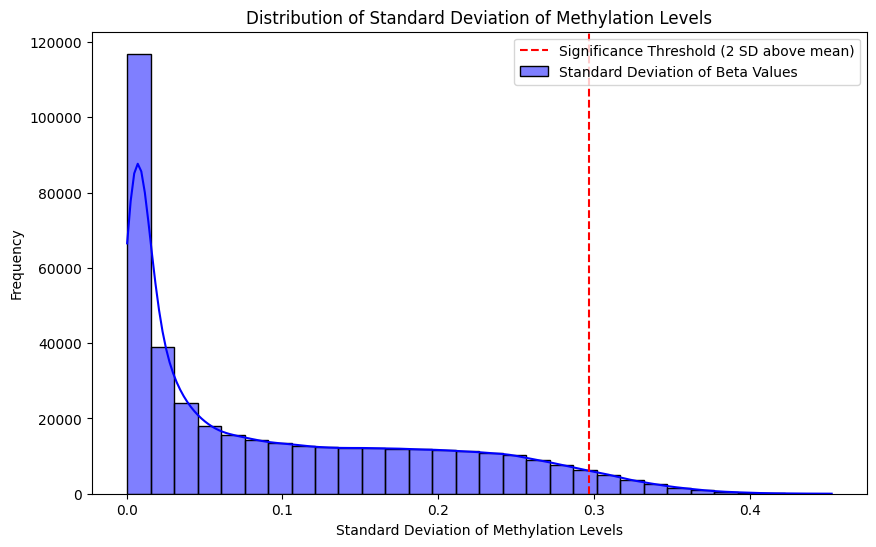

Threshold:  0.29687684557548
Number of significant methylation values: 16622


In [10]:
# Calculate the mean and standard deviation of the std_dev values
mean_std_dev = std_dev.mean()
std_dev_std_dev = std_dev.std()

# Set the threshold for significant methylation change (e.g., 2 standard deviations above the mean)
threshold = mean_std_dev + 2 * std_dev_std_dev

# Plot the histogram of standard deviations
plt.figure(figsize=(10, 6))
sns.histplot(std_dev, kde=True, color='blue', bins=30, label='Standard Deviation of Beta Values')

# Add a vertical line for the threshold
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Significance Threshold (2 SD above mean)')

# Add labels and title
plt.xlabel('Standard Deviation of Methylation Levels')
plt.ylabel('Frequency')
plt.title('Distribution of Standard Deviation of Methylation Levels')
plt.legend()

# Show the plot
plt.show()

significant = df[df['std_dev'] >= threshold]
print("Threshold: ", threshold)
print(f"Number of significant methylation values: {len(significant)}")

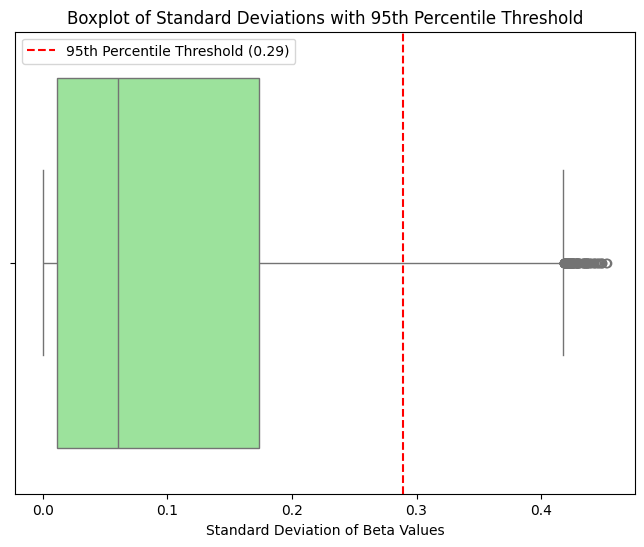

Percentile threshold:  0.2892595983816986
Number of significant methylation values: 19779


In [11]:
# Create a boxplot to visualize the distribution of the standard deviations of beta values
plt.figure(figsize=(8, 6))
sns.boxplot(data=std_dev, orient='h', color = 'lightgreen')

# Calculate the 95th percentile threshold
percentile_threshold = np.percentile(std_dev, 95)

# Overlay the threshold line
plt.axvline(x=percentile_threshold, color='red', linestyle='--', label=f'95th Percentile Threshold ({percentile_threshold:.2f})')

# Labels and title
plt.xlabel('Standard Deviation of Beta Values')
plt.title('Boxplot of Standard Deviations with 95th Percentile Threshold')
plt.legend()

# Show the plot
plt.show()

significant = df[df['std_dev'] >= percentile_threshold]
print("Percentile threshold: ", percentile_threshold)
print(f"Number of significant methylation values: {len(significant)}")

In [12]:
# Use mean value of obtained thresholds
threshold = (threshold + percentile_threshold) / 2

# Filter genes with significant variation in levels of methylation
df = df[df['std_dev'] >= threshold]
df = df.drop('std_dev', axis = 1)

print("Threshold: ", threshold)
print(f"Number of significant methylation values: {len(df)}")

Threshold:  0.2930682219785893
Number of significant methylation values: 18120


In [13]:
# Extract only Beta_value columns for filtered genes
beta_value_columns = [index for index, column in enumerate(df.columns) if 'Beta_value' in column]
beta_values = df.iloc[:, beta_value_columns]
beta_values = beta_values.apply(pd.to_numeric, errors='coerce')

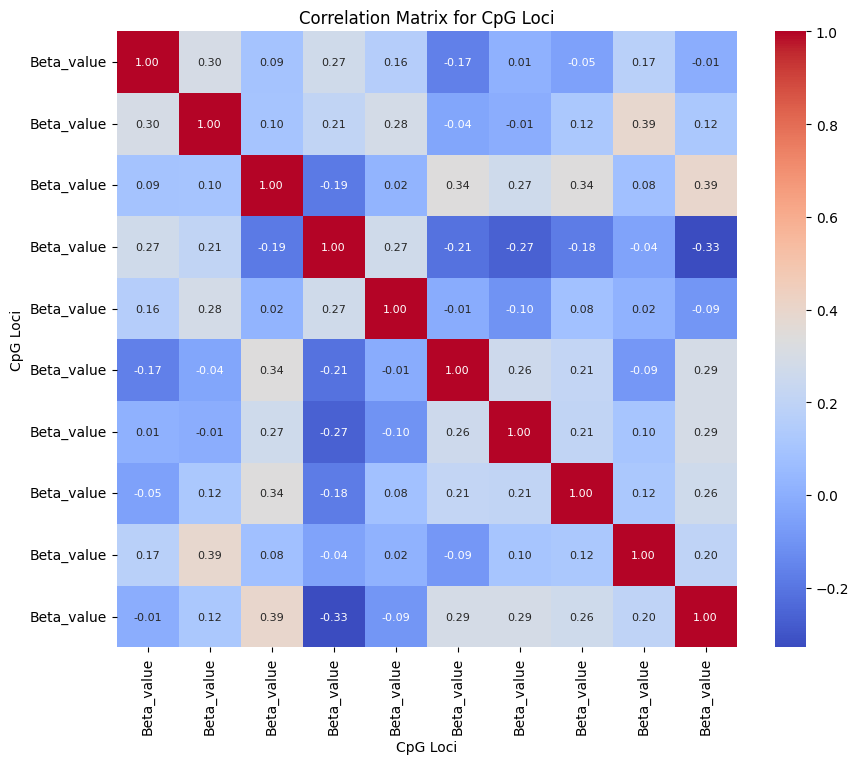

In [14]:
# Compute correlation matrix for CpG loci
correlation_matrix = beta_values.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Matrix for CpG Loci')
plt.xlabel('CpG Loci')
plt.ylabel('CpG Loci')
plt.show()

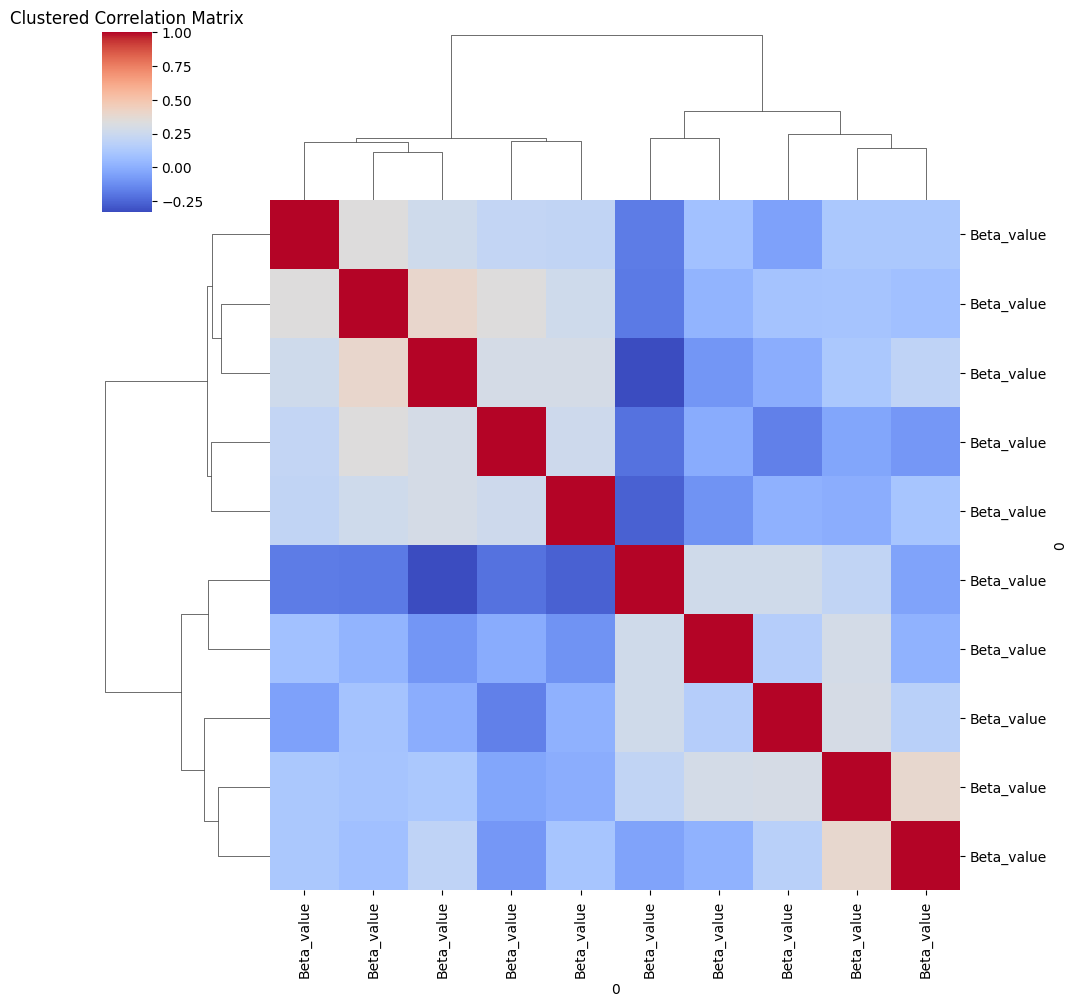

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Perform hierarchical clustering for better visualisation of correlations
linkage_matrix = linkage(correlation_matrix, method='ward')

# Plot a clustered heatmap
sns.clustermap(correlation_matrix, cmap='coolwarm', figsize=(10, 10), row_linkage=linkage_matrix, col_linkage=linkage_matrix)
plt.title('Clustered Correlation Matrix')
plt.show()

In [16]:
# Ovde dodati CPG lokuse klasterovanje

In [41]:
# Set the window size (16,330 base pairs)
window_size = 16330

# Ensure Genomic_Coordinate is numeric and sort data by chromosome and coordinate
df['Genomic_Coordinate'] = df['Genomic_Coordinate'].astype(int)
df_sorted = df.sort_values(by=['Chromosome', 'Genomic_Coordinate'])

# Assign each CpG locus to a window
df_sorted['Window'] = df_sorted['Genomic_Coordinate'] // window_size

# Group loci by window
grouped_windows = df_sorted.groupby(['Chromosome', 'Window'])

# Compute correlations and identify boundaries
window_mean_correlations = []

for (chromosome, window), group in grouped_windows:
    # Extract beta values for loci in this window
    beta_values_window = group.filter(like='Beta_value', axis=1)

    # Detect and exclude constant columns
    constant_columns = (beta_values_window.nunique() <= 1)
    if constant_columns.any():
        beta_values_window = beta_values_window.loc[:, ~constant_columns]
    
    # Compute mean correlation within the window
    if beta_values_window.shape[1] > 1:
        correlation_matrix = beta_values_window.corr()
        mean_correlation = correlation_matrix.stack().mean()
    else:
        mean_correlation = 0  # Single CpG in the window
    
    window_mean_correlations.append(mean_correlation)

# Detecting boundaries of region with sharp changes in methylation levels
threshold = np.percentile(window_mean_correlations, 95)
boundaries = [i for i, corr in enumerate(window_mean_correlations) if corr > threshold]

# Convert results into a DataFrame for visualization
results_df = pd.DataFrame({
    'Window': range(len(window_mean_correlations)),
    'Mean_Correlation': window_mean_correlations
})

In [38]:
len(boundaries)

507

In [42]:
results_df.head()

,Window,Mean_Correlation
0,0,0.00
1,1,1.00
2,2,0.36
3,3,0.64
4,4,0.16
